In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train,y_train = train['features'],train['labels']
X_validation,y_validation = valid ['features'],valid['labels']
X_test,y_test=test['features'],test['labels']


In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
X_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

In [9]:
X_test.shape


(12630, 32, 32, 3)

In [10]:
y_test.shape

(12630,)

23

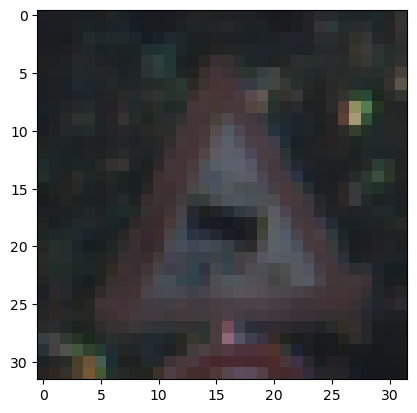

In [11]:
i = 2000
plt.imshow(X_train[i])
y_train[i]

40

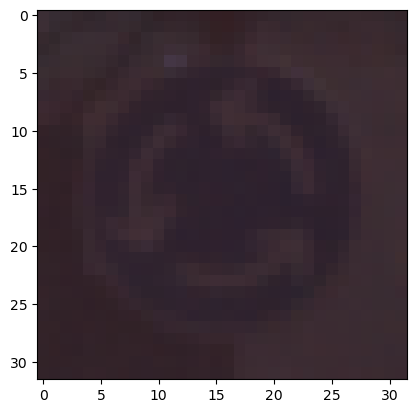

In [12]:
i = 554
plt.imshow(X_validation[i])
y_validation[i]

34

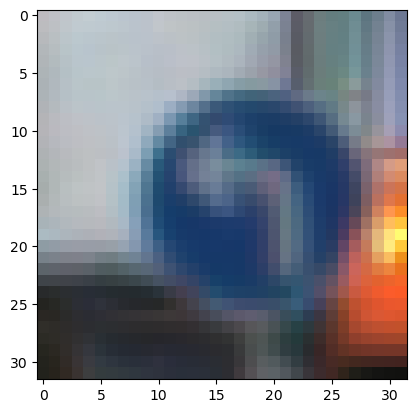

In [13]:
i = 2000
plt.imshow(X_test[i])
y_test[i]

In [14]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [15]:
X_train_gray = np.sum(X_train/3,axis = 3,keepdims = True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [16]:
X_train_gray.shape

(34799, 32, 32, 1)

In [17]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [18]:
X_train_gray_norm = (X_train_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128

In [19]:
X_train_gray_norm

array([[[[-0.65625   ],
         [-0.73958333],
         [-0.77083333],
         ...,
         [-0.8203125 ],
         [-0.8203125 ],
         [-0.81770833]],

        [[-0.640625  ],
         [-0.74479167],
         [-0.7734375 ],
         ...,
         [-0.80208333],
         [-0.78645833],
         [-0.796875  ]],

        [[-0.6484375 ],
         [-0.75520833],
         [-0.7734375 ],
         ...,
         [-0.78385417],
         [-0.78645833],
         [-0.79947917]],

        ...,

        [[-0.75520833],
         [-0.72916667],
         [-0.703125  ],
         ...,
         [-0.83333333],
         [-0.82291667],
         [-0.80729167]],

        [[-0.75260417],
         [-0.73177083],
         [-0.69791667],
         ...,
         [-0.82291667],
         [-0.84114583],
         [-0.82552083]],

        [[-0.75260417],
         [-0.7578125 ],
         [-0.73697917],
         ...,
         [-0.8125    ],
         [-0.82552083],
         [-0.84375   ]]],


       [[[-0.58854167],


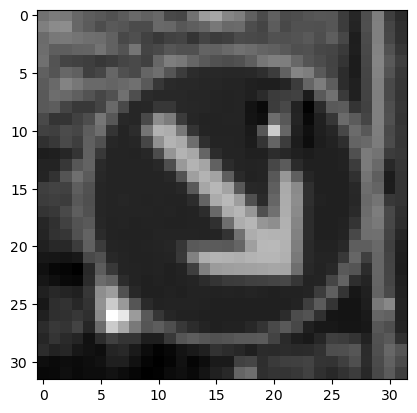

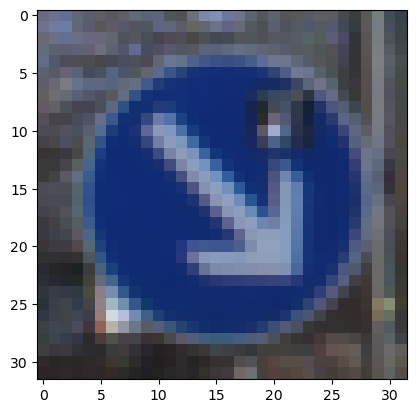

In [20]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


In [24]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [26]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [33]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics = ['accuracy'])

In [36]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=1,
                        epochs=5,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/5
34799/34799 [==============================] - 181s 5ms/step - loss: 0.3258 - accuracy: 0.9045 - val_loss: 0.4029 - val_accuracy: 0.9020
Epoch 2/5
34799/34799 [==============================] - 208s 6ms/step - loss: 0.1682 - accuracy: 0.9541 - val_loss: 0.6012 - val_accuracy: 0.8787
Epoch 3/5
34799/34799 [==============================] - 206s 6ms/step - loss: 0.1527 - accuracy: 0.9626 - val_loss: 0.5489 - val_accuracy: 0.9002
Epoch 4/5
34799/34799 [==============================] - 129s 4ms/step - loss: 0.1385 - accuracy: 0.9685 - val_loss: 0.7640 - val_accuracy: 0.9000
Epoch 5/5
34799/34799 [==============================] - 232s 7ms/step - loss: 0.1332 - accuracy: 0.9710 - val_loss: 0.6236 - val_accuracy: 0.9213


In [37]:
score = cnn_model.evaluate(X_test_gray_norm,y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 6s 15ms/step - loss: 1.2367 - accuracy: 0.9098
Test Accuracy: 0.9098178744316101


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

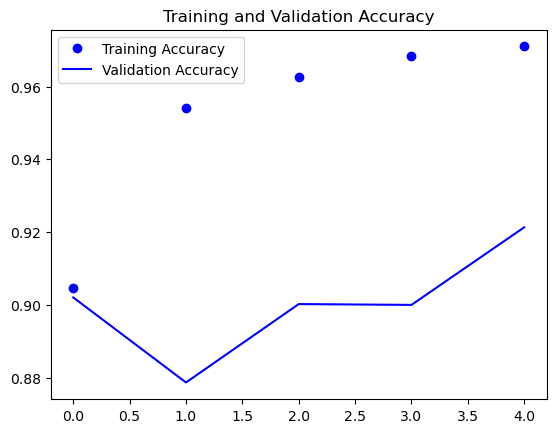

In [47]:
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

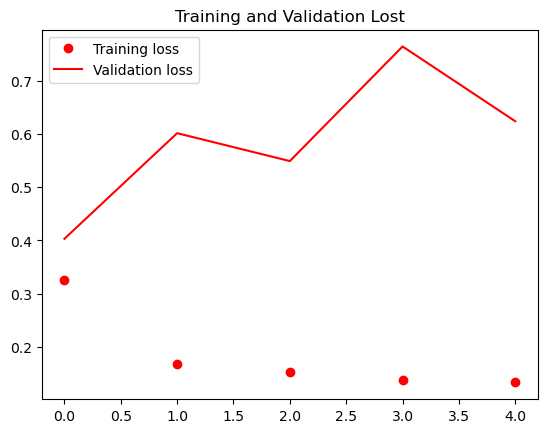

In [46]:
plt.plot(epochs,loss,'ro',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title('Training and Validation Lost')
plt.legend()

In [52]:
predicted_classes = cnn_model.predict(X_test_gray_norm)
classes_x=np.argmax(predicted_classes,axis=1)
y_true=y_test

395/395 [==============================] - 2s 6ms/step


<Axes: >

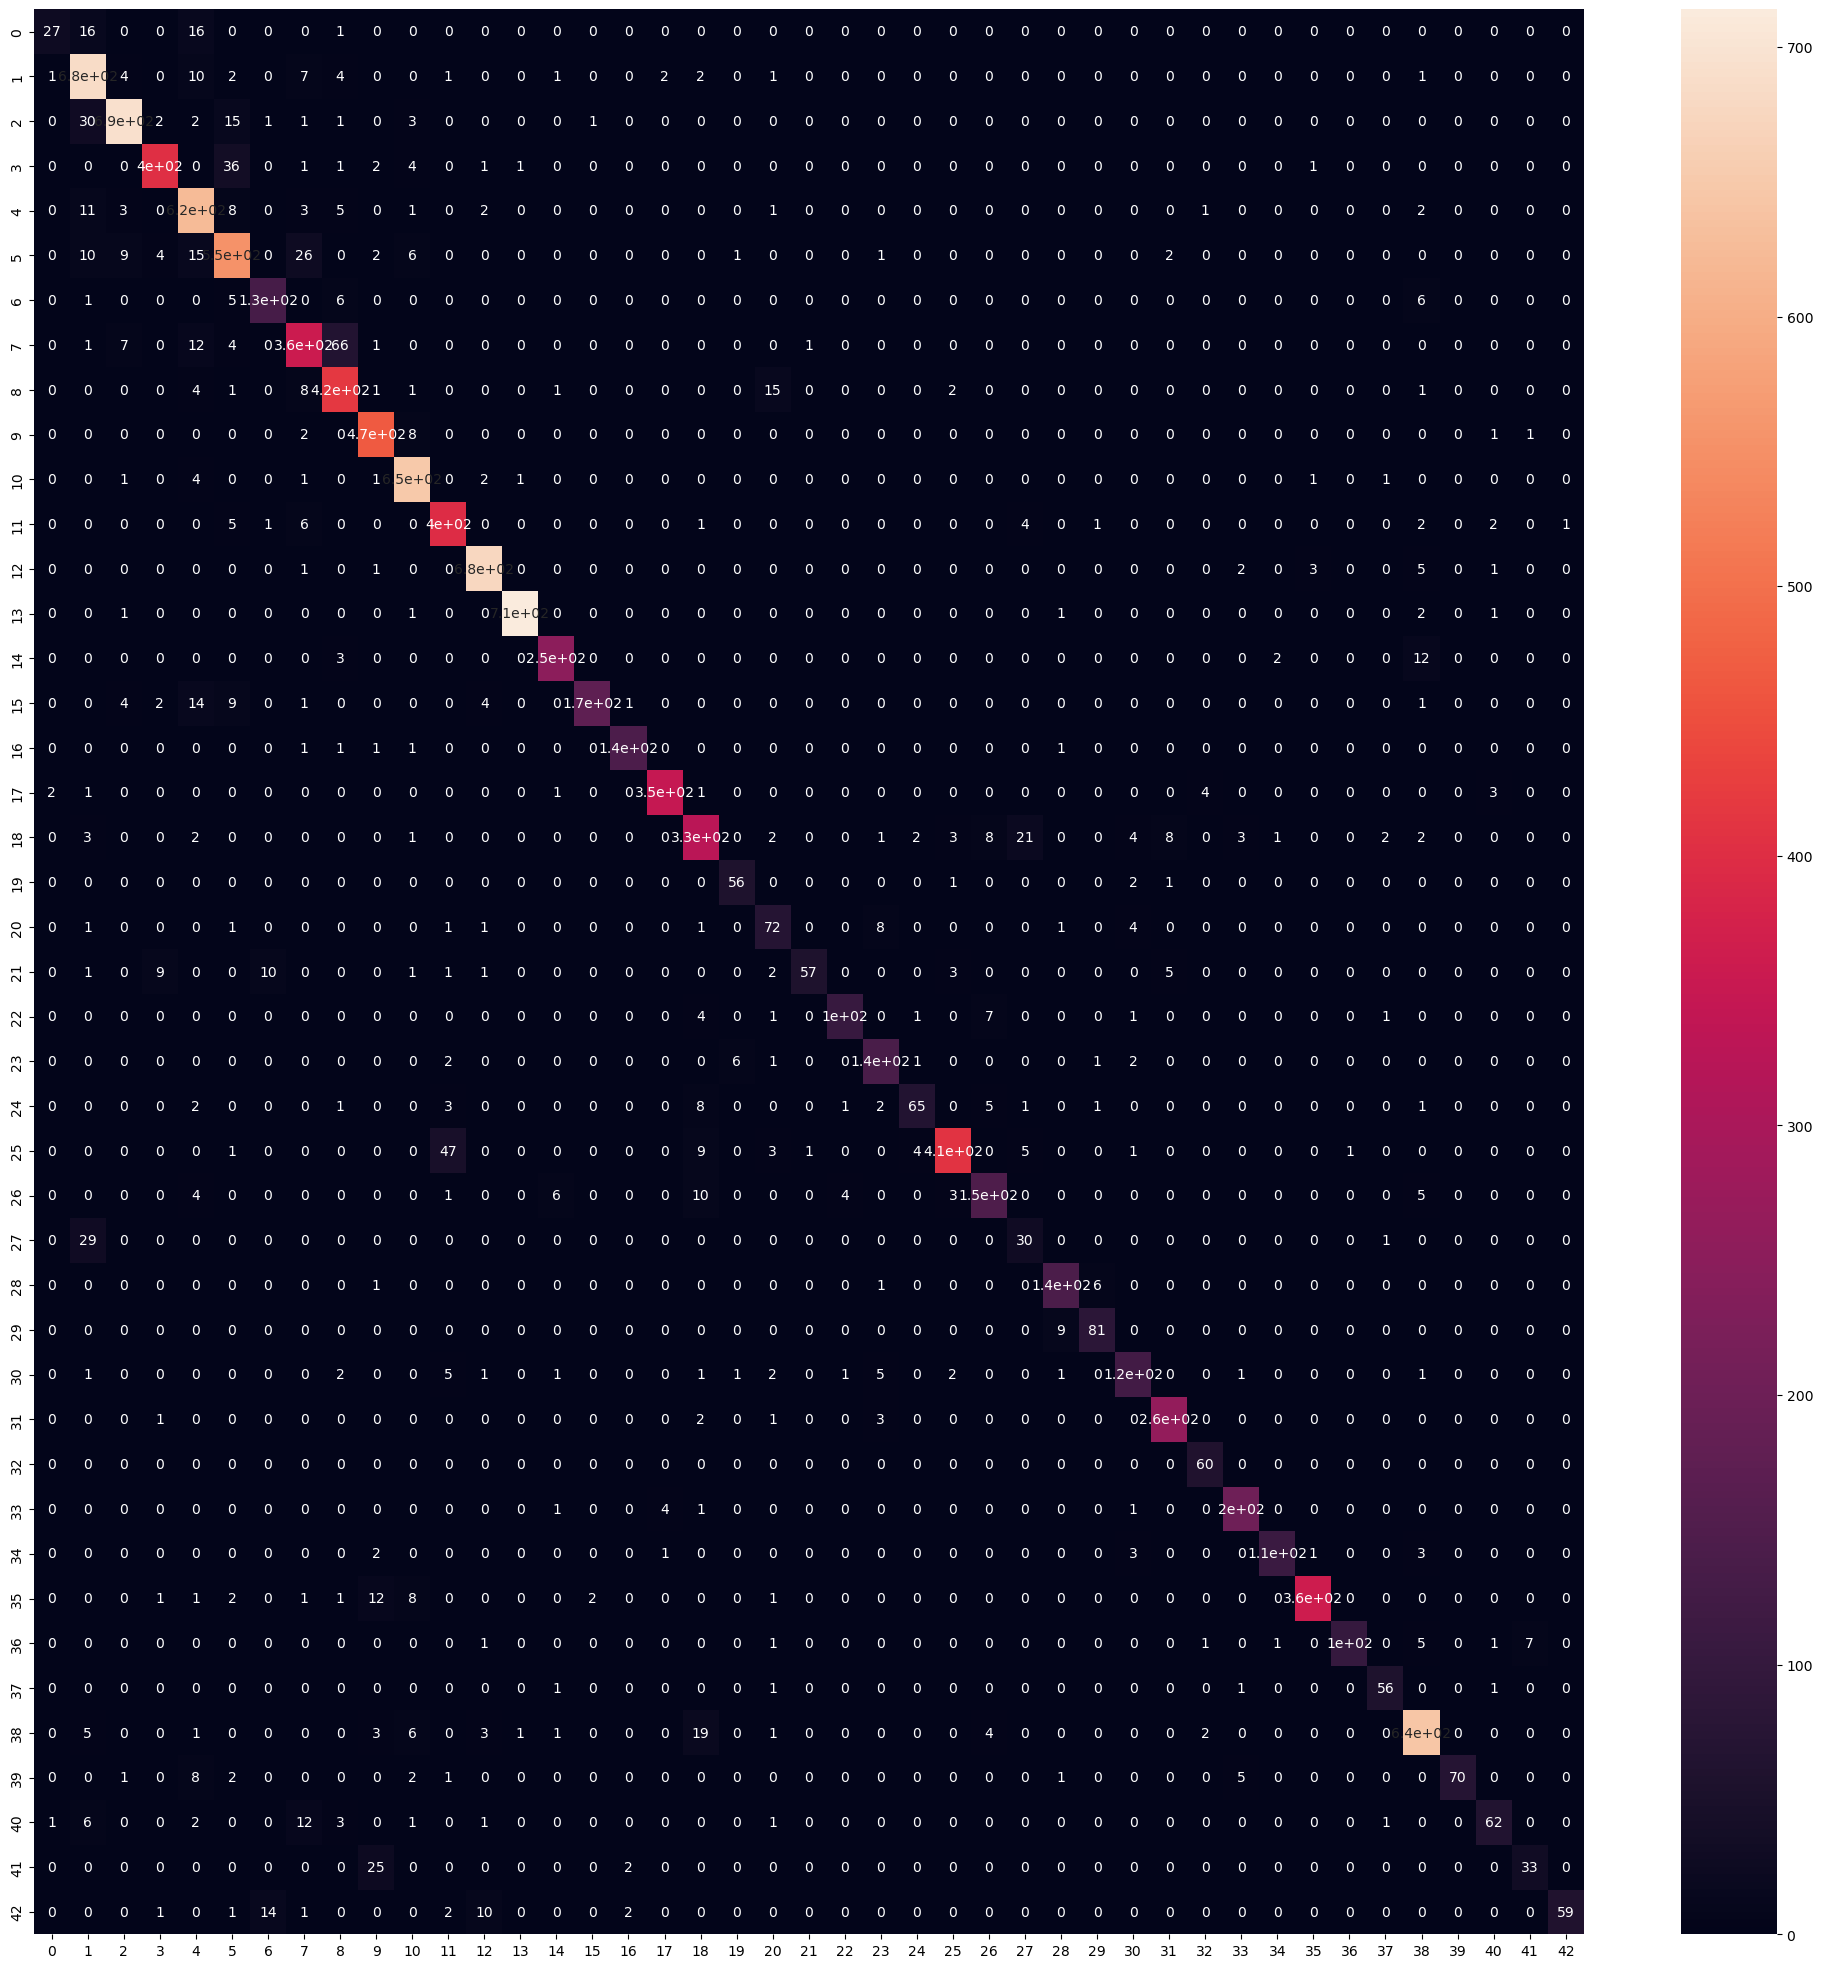

In [55]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_true,classes_x)
plt.figure(figsize= (25,25))
sns.heatmap(cm,annot=True)

                    


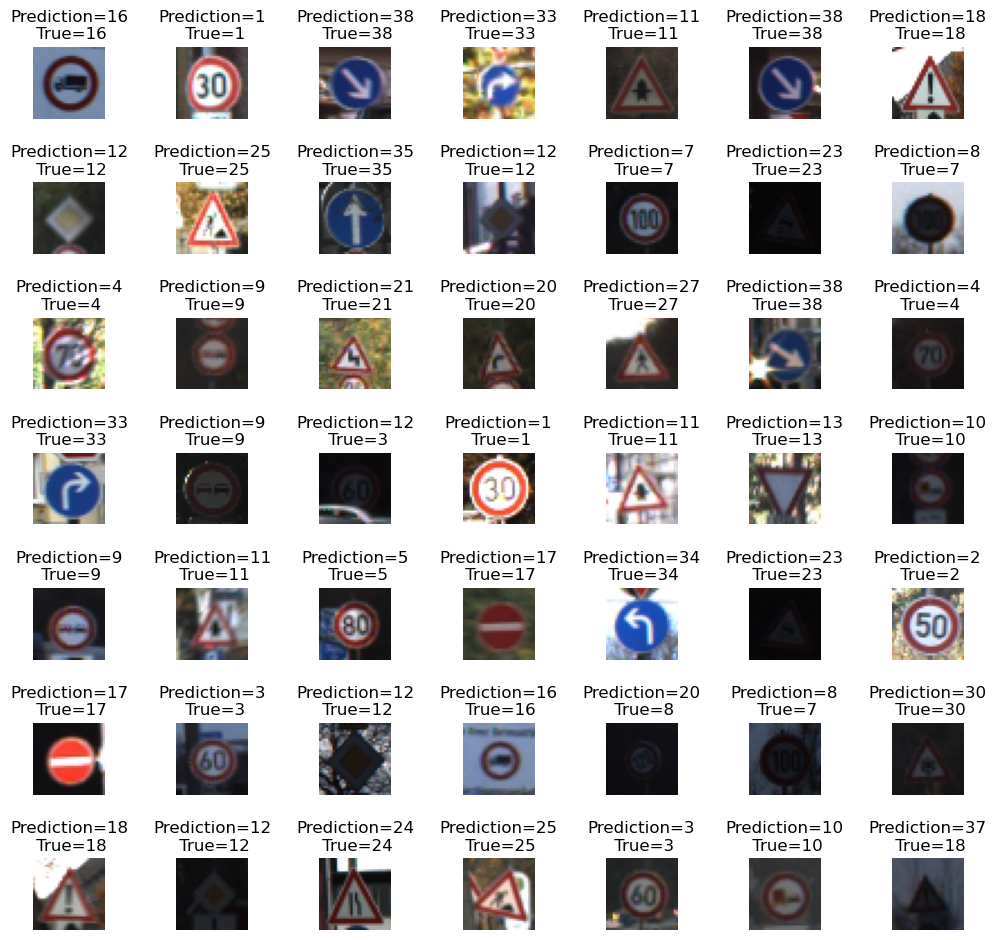

In [65]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 


for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(classes_x[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)